In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from load_data import load_data
from annual_collisions import annual_collisions
from avg_monthly_collisions import avg_monthly_collisions


Load dataset into dataframe

In [2]:
df = load_data()
df

,INCIDENT_MONTH,INCIDENT_YEAR,TIME_OF_DAY,AIRPORT,PHASE_OF_FLIGHT,SKY,SPECIES
0,5,1991,Day,SAN ANTONIO INTL,Take-off Run,No Cloud,Unknown bird - medium
1,9,1990,Day,DALLAS/FORT WORTH INTL ARPT,Approach,Some Cloud,Unknown bird - small
2,5,1992,Day,NORMAN Y. MINETA SAN JOSE INTL ARPT,Landing Roll,Some Cloud,American robin
3,8,1990,Night,LAMBERT-ST LOUIS INTL,Climb,No Cloud,Unknown bird - large
4,9,1990,Day,AUGUSTA REGIONAL ARPT AT BUSH FLD,Landing Roll,No Cloud,Unknown bird - small
...,...,...,...,...,...,...,...
143815,11,2025,Night,PHOENIX SKY HARBOR INTL ARPT,Approach,No Cloud,Unknown bird
143816,12,2025,Night,PHOENIX SKY HARBOR INTL ARPT,Climb,No Cloud,Unknown bird
143817,1,2026,Night,PHOENIX SKY HARBOR INTL ARPT,Approach,No Cloud,Unknown bird - small
143818,1,2026,Dusk,PHOENIX SKY HARBOR INTL ARPT,Approach,No Cloud,Unknown bird - small


Select airports with the most collisions. Needed for future analysis.

In [3]:
# select top 30 airports by collisions
arpts = df['AIRPORT'].value_counts().head(30).index.to_list()

# Distribution of collisions by time of day and sky conditions

Get labels and collision counts for time of day and sky conditions

In [4]:
time_collision_counts = df['TIME_OF_DAY'].value_counts()
sky_collision_counts = df['SKY'].value_counts()

time_index = time_collision_counts.index.to_list()
time_values = time_collision_counts.values.tolist()
sky_index = sky_collision_counts.index.to_list()
sky_values = sky_collision_counts.values.tolist()

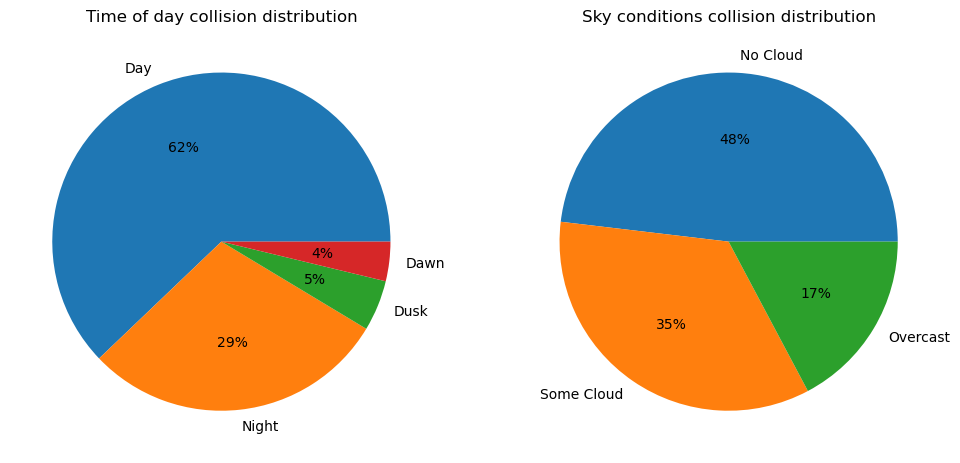

In [5]:
fig, axes = plt.subplots(ncols=2, figsize=(12,8))
axes[0].pie(time_values, labels=time_index, autopct='%.0f%%')
axes[0].set_title('Time of day collision distribution')
axes[1].pie(sky_values, labels=sky_index, autopct='%.0f%%')
axes[1].set_title('Sky conditions collision distribution')

plt.show()

# Distribution of collisons by flight phase

Get phase value counts data

In [6]:
phase_count = df['PHASE_OF_FLIGHT'].value_counts()
phase_index = phase_count.index.to_list()
phase_values = phase_count.values.tolist()

Combine small categories into a single category

In [7]:
# get sum of small values
other = sum(phase_values[4:])
# remove small values and indexes from list
del phase_values[4:], phase_index[4:]
# add combined category back to lists
phase_values.append(other)
phase_index.append('Other')

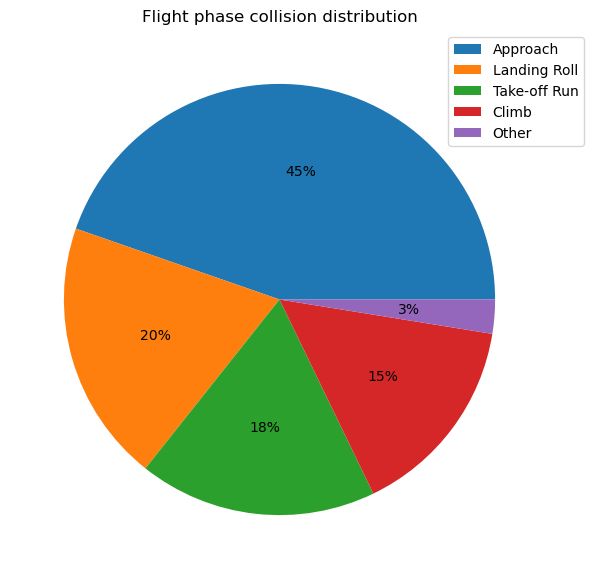

In [8]:
plt.figure(figsize=(12,7))
plt.pie(phase_values, autopct='%.0f%%')
plt.legend(phase_index, bbox_to_anchor=(.8,1))
plt.title('Flight phase collision distribution')
plt.show()

# Annual collisions

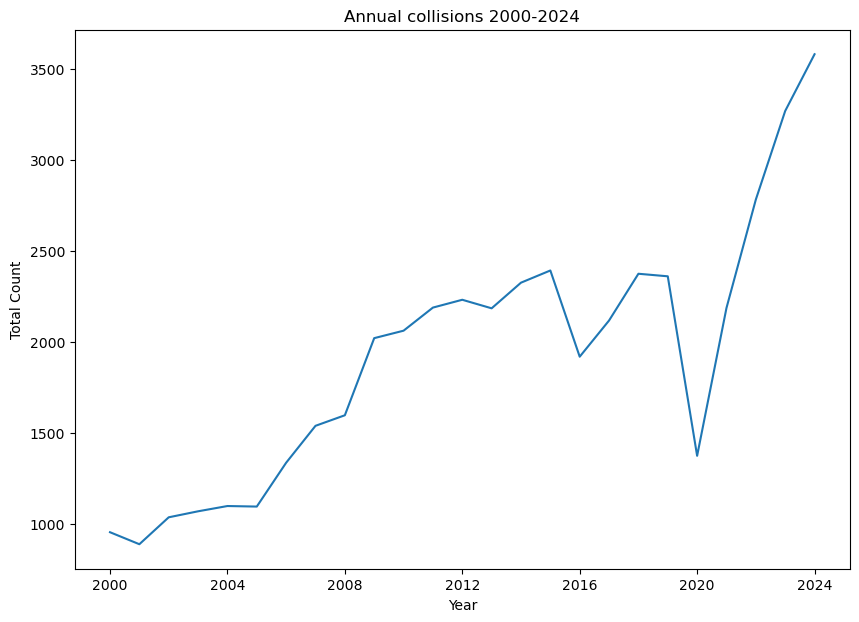

In [9]:
# dataframe for annual collisions
all_collisions = annual_collisions(df, arpts, 2000)

plt.figure(figsize=(10,7))
sns.lineplot(x='Year', y='Total Count', data=all_collisions)
plt.xticks(list(range(2000,2025,4)))
plt.title('Annual collisions 2000-2024')
plt.show()

# Annual collisions by time of day & sky condition

Load time of day data

In [10]:
# filter dataframes
day = df[df['TIME_OF_DAY'] == 'Day']
night = df[df['TIME_OF_DAY'] == 'Night']

day_data = annual_collisions(day, arpts, 2000)
night_data = annual_collisions(night, arpts, 2000)

Load sky conditions data

In [11]:
# filter dataframes
no_cloud = df[df['SKY'] == 'No Cloud']
some_cloud = df[df['SKY'] == 'Some Cloud']
overcast = df[df['SKY'] == 'Overcast']

no_cloud_data = annual_collisions(no_cloud, arpts, 2000)
some_cloud_data = annual_collisions(some_cloud, arpts, 2000)
overcast_data = annual_collisions(overcast, arpts, 2000)

Plot data

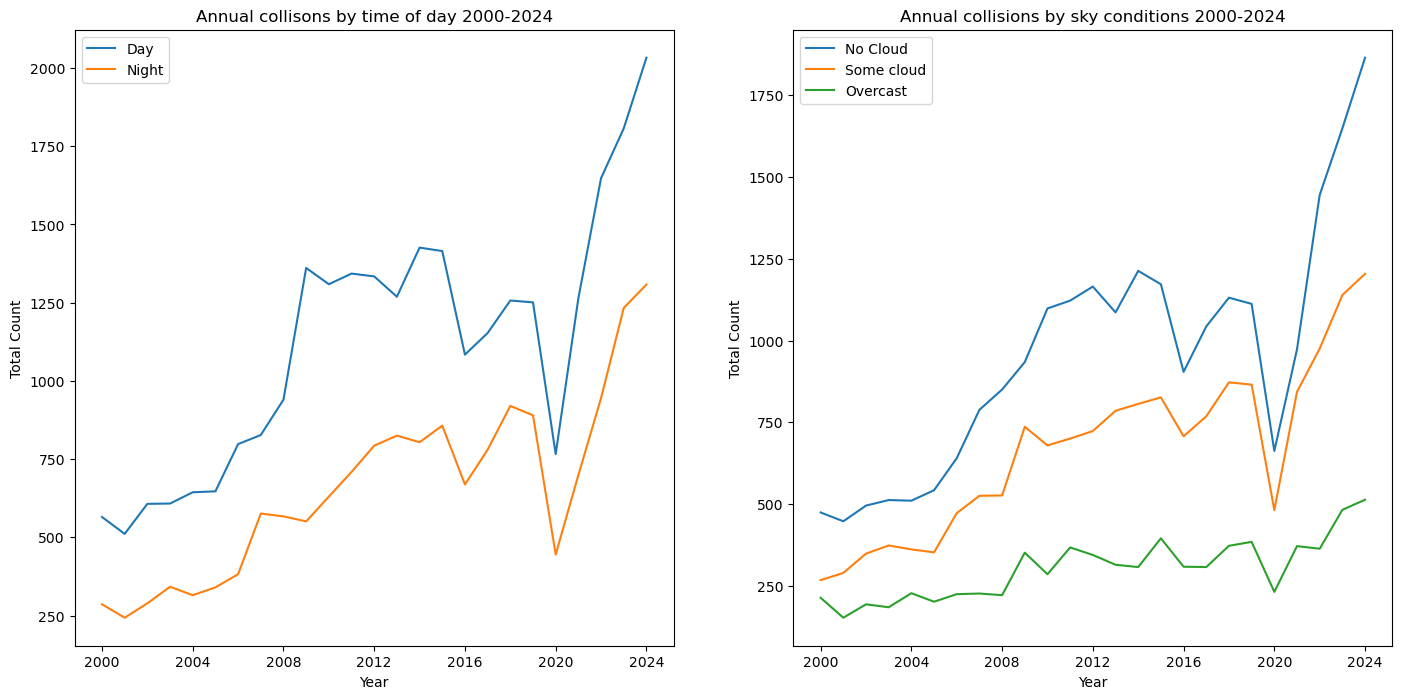

In [12]:
fig, axes = plt.subplots(ncols=2, figsize=(17,8))

# time of day plots
sns.lineplot(x='Year', y='Total Count', label='Day',
             data=day_data, ax=axes[0])
sns.lineplot(x='Year', y='Total Count', label='Night',
             data=night_data, ax=axes[0])

# sky conditions plots
sns.lineplot(x='Year', y='Total Count', label='No Cloud',
             data=no_cloud_data, ax=axes[1])
sns.lineplot(x='Year', y='Total Count', label='Some cloud',
             data=some_cloud_data, ax=axes[1])
sns.lineplot(x='Year', y='Total Count', label='Overcast',
             data=overcast_data, ax=axes[1])

# x axis formatting
axes[0].set_xticks(list(range(2000,2025,4)))
axes[1].set_xticks(list(range(2000,2025,4)))
axes[0].set_title('Annual collisons by time of day 2000-2024')
axes[1].set_title('Annual collisions by sky conditions 2000-2024')

plt.show()

# Average monthly collisions

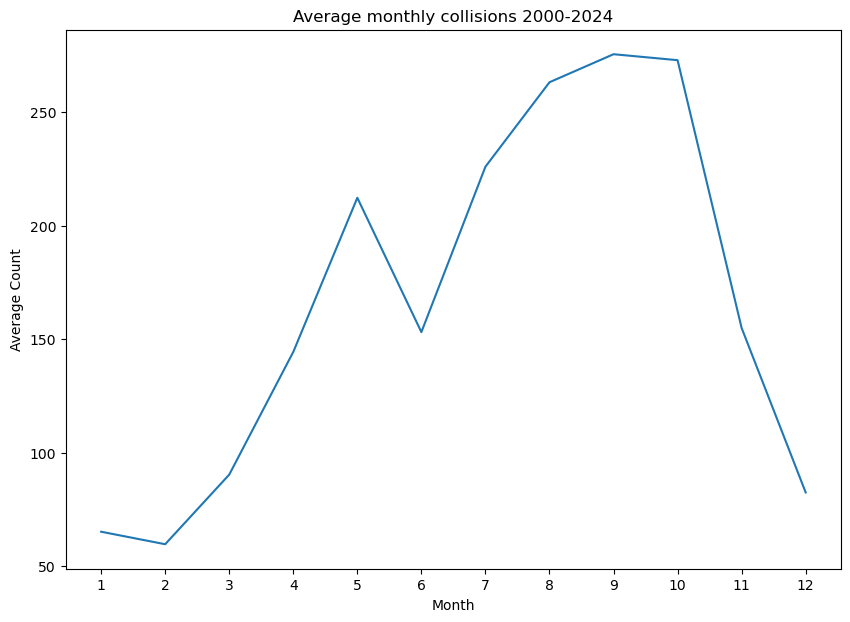

In [13]:
# dataframe for avg monthly collisions
top_arpt_data = avg_monthly_collisions(df, arpts, 2000)

plt.figure(figsize=(10,7))
sns.lineplot(x='Month', y='Average Count', data=top_arpt_data)
plt.xticks(list(range(1,13)))
plt.title("Average monthly collisions 2000-2024")
plt.show()

# Annual collisions of known vs unknown species

Select types of unknown species

In [21]:
unk_species = df[df['SPECIES'].str.contains('unknown', regex=True, case=False)]
unk_species = unk_species['SPECIES'].unique().tolist()
unk_species

['Unknown bird - medium',
 'Unknown bird - small',
 'Unknown bird - large',
 'Unknown terrestrial mammal',
 'Unknown bird',
 'Unknown bird or bat']

Get collision counts for known/unknown species

In [22]:
unk_species_df = df[df['SPECIES'].isin(unk_species)]
unk_species_data = annual_collisions(unk_species_df, arpts, 2000)

known_species_df = df[~df['SPECIES'].isin(unk_species)]
known_species_data = annual_collisions(known_species_df, arpts, 2000)

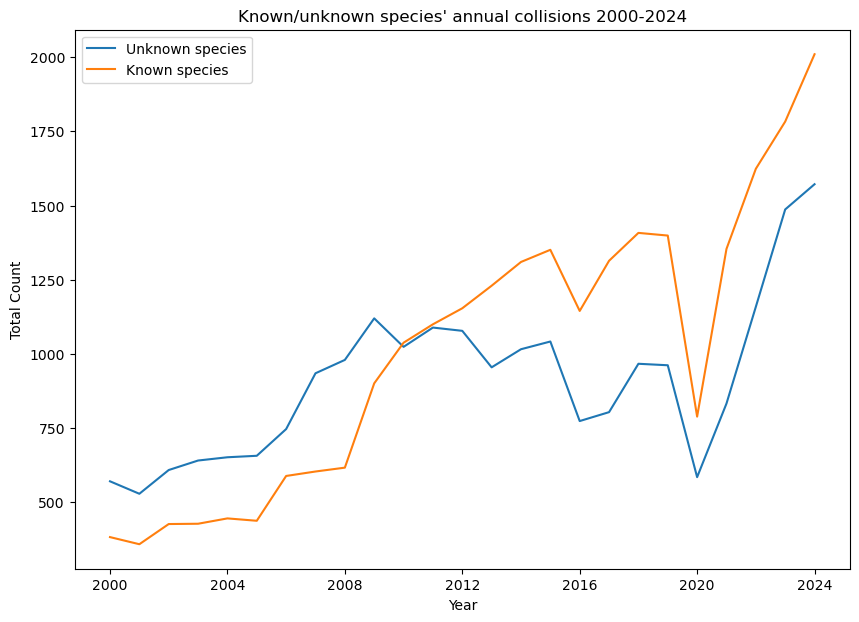

In [23]:
plt.figure(figsize=(10,7))
sns.lineplot(x='Year', y='Total Count', label='Unknown species',
             data=unk_species_data)
sns.lineplot(x='Year', y='Total Count', label='Known species',
             data=known_species_data)
plt.title("Known/unknown species' annual collisions 2000-2024")
plt.xticks(list(range(2000,2025,4)))
plt.show()

# Conclusion
Airplane wildlife collisions are increasing. Most occur during the day and under clear skies. 
<br>
<br>
Nearly half of all collisions occur when aircraft are approaching airports. Collisions are also common on the runway and during the climb. The least collisions occur away from airports.
<br>
<br>
The most collisions occur during the spring and summer, the peak month being September. This may be due to species migration and busier airports during typical vacationing months.
<br>
<br>
Collisions of known species have overtaken collisions of unknown species. This may be due to the hiring of wildlife experts at airports or improved methods of species identification. If species can be identified, then airports can tailor their wildlife management accordingly.